In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('DefendersPL21-22.csv')

In [10]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tackles won,Def 3rd,Mid 3rd,Att 3rd,Tkl,Att,Tkl%,Dribbled Past,Pressures,Successful Pressures,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Shots blocked,ShSv,Pass,Interceptions,Tackles + Interceptions,Clearances,Err,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,21,2000,32.0,2.16,1.16,1.56,0.59,0.00,1.16,1.81,63.8,0.66,13.60,3.53,26.0,7.97,4.38,1.22,2.69,0.69,0.03,2.00,1.75,3.91,2.19,0.00,Matches
2,3,Rayan Aït Nouri,fr FRA,DF,Wolves,20,2001,20.3,3.74,2.12,2.66,0.69,0.39,1.38,2.22,62.2,0.84,19.80,6.65,33.6,11.40,5.71,2.71,1.67,0.15,0.00,1.53,1.87,5.62,1.58,0.05,Matches
3,4,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,22.2,1.80,0.99,1.13,0.54,0.14,0.90,1.62,55.6,0.72,9.28,3.29,35.4,4.82,3.15,1.31,1.62,0.59,0.05,1.04,2.21,4.01,3.65,0.05,Matches
7,8,Trent Alexander-Arnold,eng ENG,DF,Liverpool,22,1998,31.7,1.39,0.76,0.69,0.47,0.22,0.73,1.86,39.0,1.14,9.09,3.06,33.7,3.60,2.78,2.71,1.23,0.16,0.03,1.07,2.40,3.79,1.36,0.03,Matches
13,14,Marcos Alonso,es ESP,DF,Chelsea,30,1990,24.1,1.87,1.16,0.87,0.54,0.46,0.58,1.33,43.8,0.75,12.40,3.53,28.3,5.02,4.19,3.24,1.62,0.25,0.00,1.37,2.74,4.61,2.28,0.00,Matches


In [7]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [9]:
df = df.loc[(df['Pos']=='DF') & (df['90s']>=15)]

In [11]:
df.shape

(102, 32)

In [14]:
df = df.drop(['Rk','Nation','Pos','Squad','Age','Born','90s','Mid 3rd.1','Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','%','Att 3rd.1','Def 3rd.1','ShSv','Pass','Err','Matches'],axis=1).reset_index()

In [15]:
df.head()

,index,Player,Tackles,Tackles won,Dribbled Past,Pressures,Successful Pressures,Blocks,Shots blocked,Interceptions,Tackles + Interceptions,Clearances
0,0,Max Aarons,2.16,1.16,0.66,13.60,3.53,2.69,0.69,1.75,3.91,2.19
1,2,Rayan Aït Nouri,3.74,2.12,0.84,19.80,6.65,1.67,0.15,1.87,5.62,1.58
2,3,Kristoffer Ajer,1.80,0.99,0.72,9.28,3.29,1.62,0.59,2.21,4.01,3.65
3,7,Trent Alexander-Arnold,1.39,0.76,1.14,9.09,3.06,1.23,0.16,2.40,3.79,1.36
4,13,Marcos Alonso,1.87,1.16,0.75,12.40,3.53,1.62,0.25,2.74,4.61,2.28


In [18]:
params = list(df.columns)
params = params[2:]
print(params)

['Tackles', 'Tackles won', 'Dribbled Past', 'Pressures', 'Successful Pressures', 'Blocks', 'Shots blocked', 'Interceptions', 'Tackles + Interceptions', 'Clearances']


In [21]:
player = df.loc[df['Player']=='Ben White'].reset_index()
player = list(player.loc[0])
player = player[3: ]

In [22]:
player 

[1.31, 0.72, 0.75, 7.88, 2.56, 1.69, 0.81, 2.06, 3.38, 3.56]

In [23]:
print(len(params),len(player))

10 10


In [24]:
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [25]:
values

[30, 26, 63, 32, 29, 42, 68, 63, 36, 52]

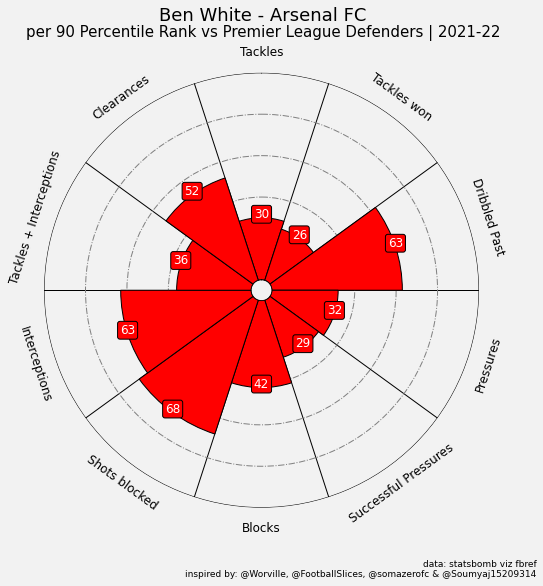

In [31]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="red", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="white", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="red",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Ben White - Arsenal FC", size=18,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "per 90 Percentile Rank vs Premier League Defenders | 2021-22",
    size=15,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000",
    ha="right"
)

plt.show()